In [26]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
import nltk
import seaborn as sns

In [2]:
yelp = pd.read_csv('yelp.csv')

In [3]:
len(yelp)

10000

In [4]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [5]:
# Counting the rating distribution
yelp.stars.value_counts()

4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64

In [6]:
X_train, X_test, y_train, y_test = train_test_split(yelp.text, yelp.stars, random_state=1)

In [7]:
# Tokenizing
vect = CountVectorizer(token_pattern=r'(?u)\b\w+\b')
train_dtm = vect.fit_transform(X_train)
test_dtm = vect.transform(X_test)
# Looking at the number of features
train_dtm.shape

(7500, 25834)

In [8]:
vect.get_feature_names()[-20:]

['zpizza',
 'zu',
 'zucca',
 'zucchini',
 'zuccini',
 'zuch',
 'zuchinni',
 'zuma',
 'zumba',
 'zupa',
 'zur',
 'zuzu',
 'zuzus',
 'zweigel',
 'zwiebel',
 'zy',
 'zzed',
 'zzzzzzzzzzzzzzzzz',
 'école',
 'òc']

In [9]:
# Adding stopwords
vect = CountVectorizer(token_pattern=r'(?u)\b\w+\b', stop_words="english")
train_dtm = vect.fit_transform(X_train)
test_dtm = vect.transform(X_test)
train_dtm.shape

(7500, 25531)

In [10]:
# using Naive Bayes to predict the star rating
nb = MultinomialNB()
nb.fit(train_dtm, y_train)
y_pred_class = nb.predict(test_dtm)
print (metrics.accuracy_score(y_test, y_pred_class))

0.4684


In [11]:
#Changing the ngram range
vect = CountVectorizer(token_pattern=r'(?u)\b\w+\b', stop_words="english",ngram_range=(1, 3))
train_dtm = vect.fit_transform(X_train)
test_dtm = vect.transform(X_test)
nb.fit(train_dtm, y_train)
y_pred_class = nb.predict(test_dtm)
print (metrics.accuracy_score(y_test, y_pred_class))

0.4316


In [19]:
#Adding min_df
vect = CountVectorizer(token_pattern=r'(?u)\b\w+\b', stop_words="english", min_df=5, ngram_range=(1, 2))
train_dtm = vect.fit_transform(X_train)
test_dtm = vect.transform(X_test)
train_dtm.shape
nb = MultinomialNB()
nb.fit(train_dtm, y_train)
y_pred_class = nb.predict(test_dtm)
print (metrics.accuracy_score(y_test, y_pred_class))

0.5264


In [20]:
# Comparing with TFID
vect = TfidfVectorizer(token_pattern=r'(?u)\b\w+\b', stop_words="english", min_df=5, ngram_range=(1, 1))
train_dtm = vect.fit_transform(X_train)
test_dtm = vect.transform(X_test)
nb = MultinomialNB()
nb.fit(train_dtm, y_train)
y_pred_class = nb.predict(test_dtm)
print (metrics.accuracy_score(y_test, y_pred_class))

0.4424


In [13]:
#Texting processing - Stemming
def split_into_lemmas(text):
    text = text.lower()
    words = TextBlob(text).words
    return [word.lemmatize() for word in words]

vect = CountVectorizer(token_pattern=r'(?u)\b\w+\b', min_df=2, analyzer=split_into_lemmas, ngram_range=(1, 1))
train_dtm = vect.fit_transform(X_train)
test_dtm = vect.transform(X_test)
train_dtm.shape
nb = MultinomialNB()
nb.fit(train_dtm, y_train)
y_pred_class = nb.predict(test_dtm)
print (metrics.accuracy_score(y_test, y_pred_class))

0.502


In [22]:
#Adding Sentiment analysis to the dataframe
def detect_sentiment(text):
    blob = None
    blob = TextBlob(text).sentiment.polarity
    return blob
yelp['sentiment'] = yelp.text.apply(detect_sentiment)

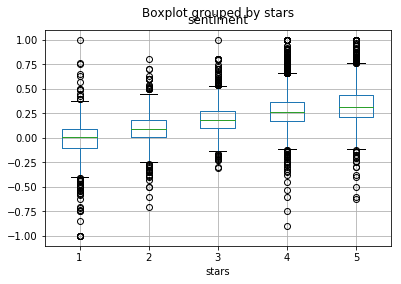

In [24]:
%matplotlib inline
yelp.boxplot(column='sentiment', by='stars')

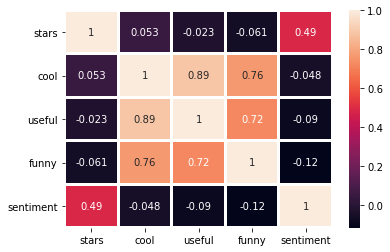

In [31]:
#Adding new features
sns.heatmap(yelp.corr(), linewidths=2, annot=True)

In [35]:
features = ['text', 'sentiment', 'cool', 'useful', 'funny']
X = yelp[features]
y = yelp['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
vect = CountVectorizer(token_pattern=r'(?u)\b\w+\b', stop_words="english", min_df=5, ngram_range=(1, 2))
train_dtm = vect.fit_transform(X_train.iloc[:, 0])
test_dtm = vect.transform(X_test.iloc[:, 0])
extra = sp.sparse.csr_matrix(X_train.iloc[:, 1:].astype(float))

In [39]:
print(extra.shape)
print(train_dtm.shape)
train_dtm_extra = sp.sparse.hstack((train_dtm, extra))
print(train_dtm_extra.shape)
extra = sp.sparse.csr_matrix(X_test.iloc[:, 1:].astype(float))
test_dtm_extra = sp.sparse.hstack((test_dtm, extra))
print(test_dtm_extra.shape)

(7500, 4)
(7500, 15342)
(7500, 15346)
(2500, 15346)


In [51]:
#Applying logistic Regression with only the text data
logreg = LogisticRegression(C=0.1)
logreg.fit(train_dtm, y_train)
y_pred_class = logreg.predict(test_dtm)
print (metrics.accuracy_score(y_test, y_pred_class))

0.5192


In [58]:
#Applying logistic Regression with all the features
logreg = LogisticRegression(C=0.1)
logreg.fit(train_dtm_extra, y_train)
y_pred_class = logreg.predict(test_dtm_extra)
print (metrics.accuracy_score(y_test, y_pred_class))

0.524
